### Задание - 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)


До:	(404, 13)
После:	(404, 2)


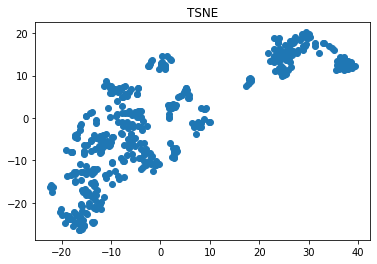

In [13]:
print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.title("TSNE")
plt.show()

### Задание - 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)


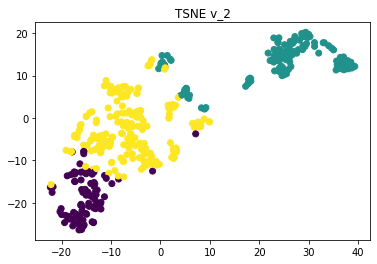

In [18]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.title("TSNE v_2")
plt.show()

In [22]:
print("Средние значения price:")
print(f"Кластер 0: {y_train[labels_train == 0].mean()}")
print(f"Кластер 1: {y_train[labels_train == 1].mean()}")
print(f"Кластер 2: {y_train[labels_train == 2].mean()}")
print("Средние значения CRIM:")
print(f"Кластер 0: {X_train.loc[labels_train == 0, 'CRIM'].mean()}")
print(f"Кластер 1: {X_train.loc[labels_train == 1, 'CRIM'].mean()}")
print(f"Кластер 2: {X_train.loc[labels_train == 2, 'CRIM'].mean()}")

Средние значения price:
Кластер 0: 27.78837209302326
Кластер 1: 16.165354330708663
Кластер 2: 24.958115183246072
Средние значения CRIM:
Кластер 0: 0.07356558139534884
Кластер 1: 10.797028425196851
Кластер 2: 0.4216602094240837


### Задание - 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [24]:
labels_test = kmeans.predict(X_test_scaled)

print("Средние значения price:")
print(f"Кластер 0: {y_test[labels_test == 0].mean()}")
print(f"Кластер 1: {y_test[labels_test == 1].mean()}")
print(f"Кластер 2: {y_test[labels_test == 2].mean()}")
print("Средние значения CRIM:")
print(f"Кластер 0: {X_test.loc[labels_test == 0, 'CRIM'].mean()}")
print(f"Кластер 1: {X_test.loc[labels_test == 1, 'CRIM'].mean()}")
print(f"Кластер 2: {X_test.loc[labels_test == 2, 'CRIM'].mean()}")

Средние значения price:
Кластер 0: 33.871428571428574
Кластер 1: 21.552830188679245
Кластер 2: 16.43714285714286
Средние значения CRIM:
Кластер 0: 0.08618571428571427
Кластер 1: 0.25200716981132076
Кластер 2: 10.165531142857143
